# **使用YOLOv3，做车牌定位**

## **第一步：需要开启GPU加速功能**

Edit -> Notebook Settings -> GPU

## **第二步：加载DarkNet**

In [1]:
# 加载远端YOLOv3网络
!git clone https://github.com/AlexeyAB/darknet

# 设置远端YOLOv3网络运行参数
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

# 看下CUDA
!/usr/local/cuda/bin/nvcc --version

# 编译DarkNet
!make

fatal: destination path 'darknet' already exists and is not an empty directory.
/content/darknet
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, in

In [2]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# 这其实就是一个连接
!ln -s /content/gdrive/My\ Drive /mydrive 
!ls /mydrive

/content
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/mydrive/My Drive': Invalid argument
'Colab Notebooks'    dataset	 yolo3
 darknet53.conv.74   Mask_RCNN	 yolov3.weights


## **第三步：加载预训练的权重**

In [0]:
# 下载预训练的权重
# !wget https://pjreddie.com/media/files/yolov3.weights
! cp /mydrive/yolov3.weights /content/darknet/yolov3.weights

In [0]:

# 显示
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# 上传文件
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# 下载文件 
def download(path):
  from google.colab import files
  files.download(path)

## **第四步：使用自带数据集进行目标检测检验**

/content/darknet
 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 

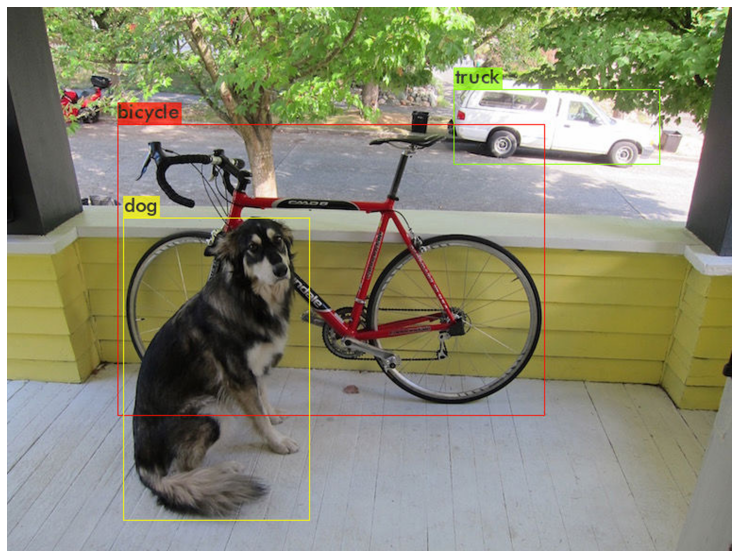

In [5]:
# 检测试一下
%cd /content/darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
# 上述函数写好了，显示一下
imShow('predictions.jpg')

In [6]:
# 到这里抛出错误，阻断程序运行
assert False

AssertionError: ignored

## **第五步：连接Goole Drive并加载要检测数据集**

In [0]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

# 这其实就是一个连接
!ln -s /content/gdrive/My\ Drive /mydrive 
!ls /mydrive

In [7]:
# zip在哪
!ls /mydrive/yolo3

backup	generate_train.py  obj.data  obj.names	obj.zip  yolov3_custom2.cfg


In [0]:
# 搞到根目录
!cp /mydrive/yolo3/obj.zip ../

In [9]:
# 解压缩
!unzip /content/obj.zip -d /content/darknet/data
# !rm -r /content/darknet/data/obj/obj

Archive:  /content/obj.zip
replace /content/darknet/data/obj/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/darknet/data/obj/1.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: no
replace /content/darknet/data/obj/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [0]:
# 下载到drive并重命名
# !cp cfg/yolov3.cfg /mydrive/yolo3/yolov3_custom2.cfg

In [0]:
# 下载到本地
# download('cfg/yolov3.cfg')

In [0]:
# 把文件放回去，从drive上传
!cp /mydrive/yolo3/yolov3_custom2.cfg ./cfg

In [0]:
# 从drive上传obj.names 和 obj.data 
!cp /mydrive/yolo3/obj.data  ./data
!cp /mydrive/yolo3/obj.names  ./data

In [0]:
# 从云端上传
!cp /mydrive/yolo3/generate_train.py ./


In [0]:
!python generate_train.py

In [16]:
#看看darknet/data目录下有没有train.txt，可以双击查看
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# 下载卷积层
# !wget http://pjreddie.com/media/files/darknet53.conv.74
! cp /mydrive/darknet53.conv.74 /content/darknet/darknet53.conv.74

长时间误操作谷歌会自动断开连接

咋办呢？打开控制台！ (CTRL + SHIFT + i)

输入下列字符 回车

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)


自动模拟点击 10 min一次

In [19]:
# !./darknet detector train data/obj.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show
# 如果colab中间断了，可以使用下面命令替代上面命令继续训练
!./darknet detector train data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolo3/backup/yolov3_custom2_last.weights -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.875737, GIOU: 0.874610), Class: 0.999929, Obj: 0.998209, No Obj: 0.000119, .5R: 1.000000, .75R: 1.000000, count: 2, class_loss = 0.000008, iou_loss = 0.021964, total_loss = 0.021972 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000007, iou_loss = 0.000000, total_loss = 0.000007 
 total_bbox = 19692, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000005, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.894876, GIOU: 0.892993), Class: 0.999962, Obj: 0.997173, No Obj: 

In [20]:
# 设置配置文件
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 610, cudnn_half = 0, GPU: Tesla P4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 B

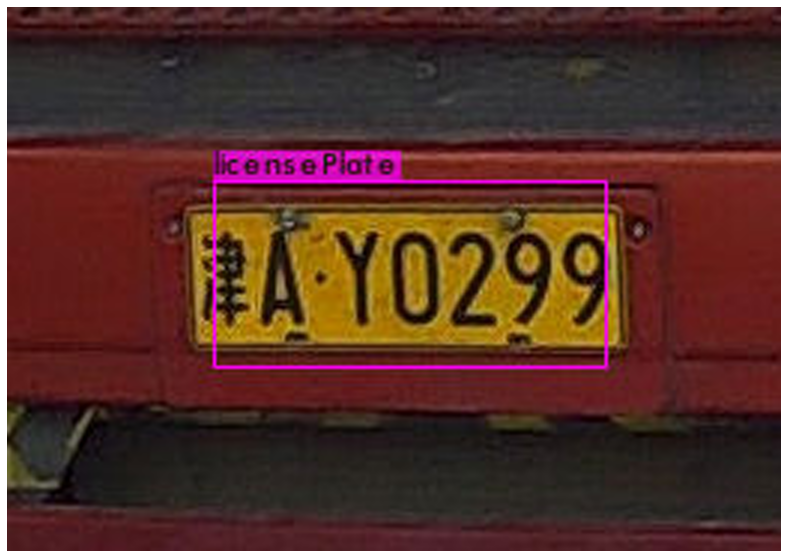

In [23]:
# 运行就好，从本地或者云端
!./darknet detector test data/obj.data cfg/yolov3_custom2.cfg /mydrive/yolo3/backup/yolov3_custom2_last.weights /mydrive/0472.jpg -thresh 0.3
imShow('predictions.jpg')